# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [18]:
medical.shape

(1338, 8)

In [19]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

A: Based on numbers below, mean is about 13270 and standard deviation is about 12110. This distribution doesn't resemble a normal distribution

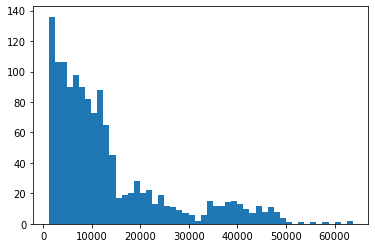

In [23]:
plt.hist(medical['charges'], bins=50)
plt.show()

In [24]:
medical['charges'].mean()

13270.422265141257

In [25]:
medical['charges'].std()

12110.011236693994

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

A: Using the sample, we can calculate the margin of error for actual average charge within a certain confidence level (say, 95% confidence level). Based on this margin of error, we can answer the question as to whether the actual average charge falling below 12000 should be a concern to the administrator.

Since the population standard deviation is not known, the most appropriate frequentist test would be t-test. 

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

A : 

    Appropriate confidence interval is 95% given the nature of administrator's concern. 

    A two-sided interval would be appropriate.
    
    Based on calculations below:
    critical value = 1.96
    95% confidence interval for the mean is (12621.5, 13919.3) 
    
    95% confidence interval of (12621.5, 13919.3) implies that 95% of the time, the actual average charge would lie between
    12621.5 and 13919.3. This means that the adminstrator doesn't need to worry that much about actual average charge falling 
    below 12000. 

In [7]:
# We will be using t-test
# Since sample size is 1338, degrees of freedom = 1338-1 = 1337

# From t-table, for 95% confidence level and df = 1337, critical_value = 1.96
# sample_standard_error = medical['charges'].std()/np.sqrt(1338) = 331.067
# margin_of_error = critical value * sample_standard_error = 648.89

In [28]:
critical_value = 1.96
sample_standard_error = medical['charges'].std()/np.sqrt(1338)
print('Sample standard error based on t test: ', sample_standard_error)

Sample standard error based on t test:  331.06745431568226


In [30]:
margin_of_error = critical_value*sample_standard_error
print('Margin of error for sample based on t test: ',margin_of_error)

Margin of error for sample based on t test:  648.8922104587372


In [31]:
Upperbound_95confidence_interval_for_mean = medical['charges'].mean() + margin_of_error
Lowerbound_95confidence_interval_for_mean = medical['charges'].mean() - margin_of_error

print('Lowerbound for 95% confidence interval based on t test: ', Lowerbound_95confidence_interval_for_mean)
print('Upperbound for 95% confidence interval based on t test: ', Upperbound_95confidence_interval_for_mean)

Lowerbound for 95% confidence interval based on t test:  12621.53005468252
Upperbound for 95% confidence interval based on t test:  13919.314475599993


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

A: Null hypothesis is that the patients with insurance are not charged a different amount than those without
  
   Alternate hypothesis is that the patients with insurance are charged a different amount than those without
   
   Assumption being made about variance of the two groups is that the variances are equal.
   

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [47]:
# Using above formula:

array_no_insurance = medical['charges'][medical['insuranceclaim']==0]
array_insurance = medical['charges'][medical['insuranceclaim']==1]

n0= len(array_no_insurance)
n1 = len(array_insurance)

s0= array_no_insurance.std()
s1 = array_insurance.std()

x0= array_no_insurance.mean()
x1 = array_insurance.mean()

sp = np.sqrt( ( (n0-1)*(s0**2) + (n1-1)*(s1**2) )/(n0+n1-2) )
t_statistic = (x0-x1)/(sp*np.sqrt((1/n0) + (1/n1)))

print('Not Insured:')
print('x0 = ',x0)
print('s0 =',s0)
print('n0 =',n0)

print('\nInsured:')
print('x1 = ',x1)
print('s1 =',s1)
print('n1=',n1)

print('\n')
print('sp = ',sp)
print('t_statistic = ',t_statistic)

Not Insured:
x0 =  8821.421892306294
s0 = 6446.510126811736
n0 = 555

Insured:
x1 =  16423.928276537663
s1 = 14045.928418802127
n1= 783


sp =  11520.034268775256
t_statistic =  -11.89329903087671


BAsed on t table, for degrees of freedom = n0 + n1 -2 = 555 + 783 - 2 = 1336 and t_statistic = -11.89, p_value < 0.00001 for 95% confidence level.

For 95% confidence level, alpha = 0.05 . Since p_value < alpha in this case, we can say that probability that the observed data is due to random chance/random sampling error is very small and hence null hypothesis an be rejected and alternate hypothesis can be accepted. Hence we can say with 95% confidence level that patients with insurance are charged a different amount than those without.

In [42]:
# Using appropriate function from scipy.stats
from scipy import stats
stats.ttest_ind (array_no_insurance,array_insurance)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

t_statistic matches for formula approach and approach using appropriate function from scipy.stats

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

A: Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

In [43]:
stats.ttest_ind (array_no_insurance,array_insurance, equal_var=False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

A: stats.zscore is the equivalent one for performing z-test from a sample. This function returns zscore only. Unlike ttest_ind function for t-test, this function doesn't return corresponding p-value for z-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test